# 0. 라이브러리

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [154]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# 1. 데이터 불러오기

In [155]:
data = pd.read_csv('./data/기업별재무거시데이터.csv', dtype={'종목코드':str})

In [156]:
data.head(1)

,기업명,종목코드,상장일,지속기간,기준연도,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수,부도,폐지일
0,3S,060310,2002-04-23,7861,2022,69.873715,0.588673,0.022297,0.017986,0.031284,0.053563,16.142265,13.399616,40.639176,196.979059,1.182665,0.416268,1.012011,0.707129,24.023192,24.899618,2.61,1291.4,2.49,679.29,110.1,100.28,94.21,0,NaN


# 2. 데이터 전처리

In [157]:
data.상장일 = pd.to_datetime(data.상장일)
data.폐지일 = pd.to_datetime(data.폐지일)

In [158]:
data.shape

(1522, 30)

In [159]:
data.columns

Index(['기업명', '종목코드', '상장일', '지속기간', '기준연도', '부채비율', '자기자본비율', '총자산영업이익율',
       'ROA', 'ROE', '매출액영업이익율', '총자산증가율', '매출액증가율', '당기순이익증가율', '영업이익증가율',
       '유동비율', '자산회전율', '부채회전율', '자본회전율', '총매출액규모', '총자산규모', 'GDP성장률', '원달러환율',
       'CD91일', '코스닥종가', '전산업생산지수', '경제심리지수', '뉴스심리지수', '부도', '폐지일'],
      dtype='object')

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1522 entries, 0 to 1521
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   기업명       1522 non-null   object        
 1   종목코드      1522 non-null   object        
 2   상장일       1522 non-null   datetime64[ns]
 3   지속기간      1522 non-null   int64         
 4   기준연도      1522 non-null   int64         
 5   부채비율      1522 non-null   float64       
 6   자기자본비율    1522 non-null   float64       
 7   총자산영업이익율  1522 non-null   float64       
 8   ROA       1522 non-null   float64       
 9   ROE       1522 non-null   float64       
 10  매출액영업이익율  1522 non-null   float64       
 11  총자산증가율    1522 non-null   float64       
 12  매출액증가율    1522 non-null   float64       
 13  당기순이익증가율  1522 non-null   float64       
 14  영업이익증가율   1522 non-null   float64       
 15  유동비율      1522 non-null   float64       
 16  자산회전율     1522 non-null   float64       
 17  부채회전율     1522

# 3. train test split

In [161]:
X = data.drop(['기업명', '종목코드', '상장일', '기준연도', '폐지일', '부도'], axis=1)
y = data['부도']

In [162]:
X.shape

(1522, 24)

In [163]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=42)

In [164]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((913, 24), (609, 24), (913,), (609,))

In [165]:
train_X.head(2)

,지속기간,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
39,5061,23.556654,0.809345,0.012508,0.049495,0.082543,0.011152,-3.994233,-6.012638,976.168207,2437.154030,5.973676,1.121559,5.882675,1.385761,23.976471,23.861751,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
542,2416,51.105608,0.661789,-0.254133,-0.255992,-0.347118,-0.830723,-1.112653,23.357838,-26.171072,-25.861151,7.150006,0.305917,0.904516,0.462258,21.930853,23.115293,2.61,1291.4,2.49,679.29,110.1,100.28,94.21


# 4. Scaling

In [166]:
train_X.head(7)

,지속기간,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
39,5061,23.556654,0.809345,0.012508,0.049495,0.082543,0.011152,-3.994233,-6.012638,976.168207,2437.154030,5.973676,1.121559,5.882675,1.385761,23.976471,23.861751,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
542,2416,51.105608,0.661789,-0.254133,-0.255992,-0.347118,-0.830723,-1.112653,23.357838,-26.171072,-25.861151,7.150006,0.305917,0.904516,0.462258,21.930853,23.115293,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
242,3927,1273.300426,0.072817,-0.412196,-0.761854,-9.928793,-0.179779,74.407476,100.000000,130.150252,86.156023,0.959191,2.292795,2.472862,31.486964,24.406934,23.577162,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
136,4331,27.045154,0.787122,0.145383,0.133794,0.174710,0.168088,2.932603,3.802475,1.637163,-9.300498,3.442521,0.864917,4.062967,1.098836,25.247116,25.392238,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
1203,2224,54.293086,0.648117,0.037841,0.017102,0.023447,0.049576,11.333830,64.797342,873.879096,209.201955,1.685913,0.763309,2.169213,1.177733,24.296457,24.566549,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
1054,8155,56.117416,0.640544,-0.035087,-0.080005,-0.128203,-0.102609,-32.886105,27.310851,15.903560,-103.193675,2.614926,0.341944,0.951282,0.533835,23.962044,25.035151,2.61,1291.4,2.49,679.29,110.1,100.28,94.21
1120,2514,18.684500,0.842570,-0.083178,-0.062369,-0.072166,-0.136737,-11.536746,-58.195988,300.408513,295.852475,2.634161,0.608310,3.864001,0.721969,24.367265,24.864336,2.61,1291.4,2.49,679.29,110.1,100.28,94.21


In [167]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()

cols = train_X.columns
idx_tr = train_X.index
idx_te = test_X.index

# DataFrame으로 변환 후 Scaler 적용
train_X = pd.DataFrame(scaler.fit_transform(train_X), columns=cols, index=idx_tr)
test_X = pd.DataFrame(scaler.transform(test_X), columns=cols, index=idx_te)

In [168]:
train_X.head(7)

,지속기간,부채비율,자기자본비율,총자산영업이익율,ROA,ROE,매출액영업이익율,총자산증가율,매출액증가율,당기순이익증가율,영업이익증가율,유동비율,자산회전율,부채회전율,자본회전율,총매출액규모,총자산규모,GDP성장률,원달러환율,CD91일,코스닥종가,전산업생산지수,경제심리지수,뉴스심리지수
39,0.021653,-0.219323,0.728096,0.106632,0.321739,0.147434,0.104696,-0.069374,-0.168417,0.440033,3.154966,0.803528,0.857687,1.370609,-0.018347,-0.640356,-1.319131,0.029467,0.213985,0.206342,-0.143732,0.204724,0.119932,-0.17441
542,-0.873469,-0.127247,0.235673,-1.635801,-0.685036,-0.183781,-0.077138,0.001367,0.365813,0.002315,-0.023510,1.127452,-0.902373,-0.670749,-0.398441,-1.912043,-1.894285,0.029467,0.213985,0.206342,-0.143732,0.204724,0.119932,-0.17441
242,-0.362116,3.957692,-1.729833,-2.668708,-2.352173,-7.570079,0.063458,1.855359,1.759883,0.070580,0.121046,-0.577303,3.385078,-0.027629,12.370651,-0.372753,-1.538410,0.029467,0.213985,0.206342,-0.143732,0.204724,0.119932,-0.17441
136,-0.225394,-0.207664,0.653932,0.974937,0.599557,0.218484,0.138592,0.100677,0.010114,0.014458,-0.002139,0.106527,0.303884,0.624414,-0.136439,0.149559,-0.139874,0.029467,0.213985,0.206342,-0.143732,0.204724,0.119932,-0.17441
1203,-0.938446,-0.116593,0.190048,0.272181,0.214983,0.101878,0.112995,0.306924,1.119570,0.395364,0.279834,-0.377187,0.084624,-0.152144,-0.103967,-0.441432,-0.776076,0.029467,0.213985,0.206342,-0.143732,0.204724,0.119932,-0.17441
1054,1.068725,-0.110496,0.164774,-0.204387,-0.105047,-0.015025,0.080125,-0.778659,0.437716,0.020689,-0.123306,-0.121366,-0.824631,-0.651572,-0.368981,-0.649325,-0.415013,0.029467,0.213985,0.206342,-0.143732,0.204724,0.119932,-0.17441
1120,-0.840304,-0.235608,0.838973,-0.518654,-0.046924,0.028172,0.072754,-0.254540,-1.117597,0.144931,0.391655,-0.116070,-0.249846,0.542826,-0.291549,-0.397413,-0.546628,0.029467,0.213985,0.206342,-0.143732,0.204724,0.119932,-0.17441


# 5. SMOTE

In [169]:
train_y.value_counts()

0    867
1     46
Name: 부도, dtype: int64

In [170]:
test_y.value_counts()

0    568
1     41
Name: 부도, dtype: int64

In [171]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Use fit_resample instead of fit_sample
train_X_over, train_y_over = smote.fit_resample(train_X, train_y)

print("SMOTE 적용 전 training set:", train_X.shape, train_y.shape)
print("SMOTE 적용 전 부도여부 count:\n", train_y.value_counts())
print("----------- SMOTE 적용 -----------")
print("SMOTE 적용 후 training set:", train_X_over.shape, train_y_over.shape)
print("SMOTE 적용 후 부도여부 count:\n", train_y_over.value_counts())

SMOTE 적용 전 training set: (913, 24) (913,)
SMOTE 적용 전 부도여부 count:
 0    867
1     46
Name: 부도, dtype: int64
----------- SMOTE 적용 -----------
SMOTE 적용 후 training set: (1734, 24) (1734,)
SMOTE 적용 후 부도여부 count:
 0    867
1    867
Name: 부도, dtype: int64


In [172]:
train_X = train_X_over.copy()
train_y = train_y_over.copy()

## 6. 기업 부도 예측

In [173]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

### DecisionTree

In [174]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_X, train_y)

print(f"Accuracy for DecisionTree : {accuracy_score(test_y, dt.predict(test_X))}")
print(f"F1_score for DecisionTree : {f1_score(test_y, dt.predict(test_X))}")

Accuracy for DecisionTree : 0.9852216748768473
F1_score for DecisionTree : 0.8965517241379309


#### DecisionTree Tuning

In [175]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
dt = DecisionTreeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_dt.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_dt.best_params_
print("Best hyperparameters for DecisionTree: ", grid_search_dt.best_params_)

Best hyperparameters for DecisionTree:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [176]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, random_state=42)
dt.fit(train_X, train_y)

print(f"Accuracy for DecisionTree : {accuracy_score(test_y, dt.predict(test_X))}")
print(f"F1_score for DecisionTree : {f1_score(test_y, dt.predict(test_X))}")

Accuracy for DecisionTree : 0.9852216748768473
F1_score for DecisionTree : 0.8965517241379309


### RandomForest

In [177]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(train_X, train_y)

print(f"Accuracy for RandomForest : {accuracy_score(test_y, rf.predict(test_X))}")
print(f"F1_score for RandomForest : {f1_score(test_y, rf.predict(test_X))}")

Accuracy for RandomForest : 0.9967159277504105
F1_score for RandomForest : 0.975


#### RandomForest Tuning

In [178]:
from sklearn.model_selection import GridSearchCV

# Create the random forest regressor
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a grid search object using the defined parameter grid
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf.fit(train_X, train_y)

# Get the best parameters from the grid search
best_params = grid_search_rf.best_params_
print("Best hyperparameters for RandomForest: ", grid_search_rf.best_params_)

Best hyperparameters for RandomForest:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [179]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
rf.fit(train_X, train_y)

print(f"Accuracy for RandomForest : {accuracy_score(test_y, rf.predict(test_X))}")
print(f"F1_score for RandomForest : {f1_score(test_y, rf.predict(test_X))}")

Accuracy for RandomForest : 0.9967159277504105
F1_score for RandomForest : 0.975


### LightGBM

In [180]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state=42)
lgbm.fit(train_X, train_y)

print(f"Accuracy for LightGBM : {accuracy_score(test_y, lgbm.predict(test_X))}")
print(f"F1_score for LightGBM : {f1_score(test_y, lgbm.predict(test_X))}")

Accuracy for LightGBM : 0.9967159277504105
F1_score for LightGBM : 0.975


#### LightGBM Tuning

In [181]:
from sklearn.model_selection import GridSearchCV

# Define the model
lgbm = LGBMClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'num_leaves': [5, 10],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 500, 1000]
}

# Perform grid search
grid_search_lgbm = GridSearchCV(lgbm, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search_lgbm.fit(train_X, train_y)

# Print the best hyperparameters
print("Best hyperparameters for LightGBM: ", grid_search_lgbm.best_params_)

Best hyperparameters for LightGBM:  {'learning_rate': 0.01, 'n_estimators': 1000, 'num_leaves': 5}


In [182]:
lgbm = LGBMClassifier(learning_rate=0.01, n_estimators=1000, num_leaves=5, random_state=42)
lgbm.fit(train_X, train_y)

print(f"Accuracy for LightGBM : {accuracy_score(test_y, lgbm.predict(test_X))}")
print(f"F1_score for LightGBM : {f1_score(test_y, lgbm.predict(test_X))}")

Accuracy for LightGBM : 0.9950738916256158
F1_score for LightGBM : 0.9629629629629629


### XGBoost

In [183]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(train_X, train_y)

print(f"Accuracy for XGBoost : {accuracy_score(test_y, xgb.predict(test_X))}")
print(f"F1_score for XGBoost : {f1_score(test_y, xgb.predict(test_X))}")

Accuracy for XGBoost : 0.9885057471264368
F1_score for XGBoost : 0.9213483146067416


#### XGBoost Tuning

In [184]:
from sklearn.model_selection import GridSearchCV

# Define the model
xgb = XGBClassifier(random_state=42)

# Define the hyperparameters to be tuned
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Define the GridSearchCV
grid_search_xgb = GridSearchCV(xgb, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV with the data
grid_search_xgb.fit(train_X, train_y)

# Get the best hyperparameters and print the best score
best_params = grid_search_xgb.best_params_
print("Best hyperparameters for XGBoost: ", best_params)

Best hyperparameters for XGBoost:  {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [185]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50, random_state=42)
xgb.fit(train_X, train_y)

print(f"Accuracy for XGBoost : {accuracy_score(test_y, xgb.predict(test_X))}")
print(f"F1_score for XGBoost : {f1_score(test_y, xgb.predict(test_X))}")

Accuracy for XGBoost : 0.9950738916256158
F1_score for XGBoost : 0.9647058823529412


### MLP

In [186]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=300, random_state=42)
mlp.fit(train_X, train_y)

print(f"Accuracy for MLP : {accuracy_score(test_y, mlp.predict(test_X))}")
print(f"F1_score for MLP : {f1_score(test_y, mlp.predict(test_X))}")

Accuracy for MLP : 0.9950738916256158
F1_score for MLP : 0.963855421686747


#### MLP Tuning

In [187]:
from sklearn.model_selection import GridSearchCV

# Define the MLPRegressor model
mlp = MLPClassifier(max_iter=300, random_state=42)

# Define the hyperparameters to be tuned
param_grid = {'hidden_layer_sizes': [(10,), (50,)], 
              'activation': ['logistic', 'tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.001, 0.01, 0.1]}

# Create the GridSearchCV object
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_mlp.fit(train_X, train_y)

# Get the best parameters and the best MLPRegressor model
best_params = grid_search_mlp.best_params_

print("Best hyperparameters for MLP: ", best_params)

/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/yeorii/opt/anaconda3/envs/yeonii/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't conv

Best hyperparameters for MLP:  {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'solver': 'lbfgs'}


In [188]:
mlp = MLPClassifier(activation='tanh', alpha=0.01, hidden_layer_sizes=(10,), solver='lbfgs', max_iter=300, random_state=42)
mlp.fit(train_X, train_y)

print(f"Accuracy for MLP : {accuracy_score(test_y, mlp.predict(test_X))}")
print(f"F1_score for MLP : {f1_score(test_y, mlp.predict(test_X))}")

Accuracy for MLP : 0.986863711001642
F1_score for MLP : 0.9069767441860465


### SVM

In [189]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(train_X, train_y)

print(f"Accuracy for SVM: {accuracy_score(test_y, svm.predict(test_X))}")
print(f"F1 Score for SVM: {f1_score(test_y, svm.predict(test_X))}")

Accuracy for SVM: 0.9917898193760263
F1 Score for SVM: 0.9350649350649352


### Naive Bayes

In [190]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)

print(f"Accuracy for Naive Bayes: {accuracy_score(test_y, nb.predict(test_X))}")
print(f"F1 Score for Naive Bayes: {f1_score(test_y, nb.predict(test_X))}")


Accuracy for Naive Bayes: 0.9917898193760263
F1 Score for Naive Bayes: 0.9411764705882352


# 6. 변수 중요도 시각화

In [191]:
import skimage
import shap

In [192]:
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100, random_state=42)
rf.fit(train_X, train_y)

print(f"Accuracy for RandomForest : {accuracy_score(test_y, rf.predict(test_X))}")
print(f"F1_score for RandomForest : {f1_score(test_y, rf.predict(test_X))}")

Accuracy for RandomForest : 0.9967159277504105
F1_score for RandomForest : 0.975


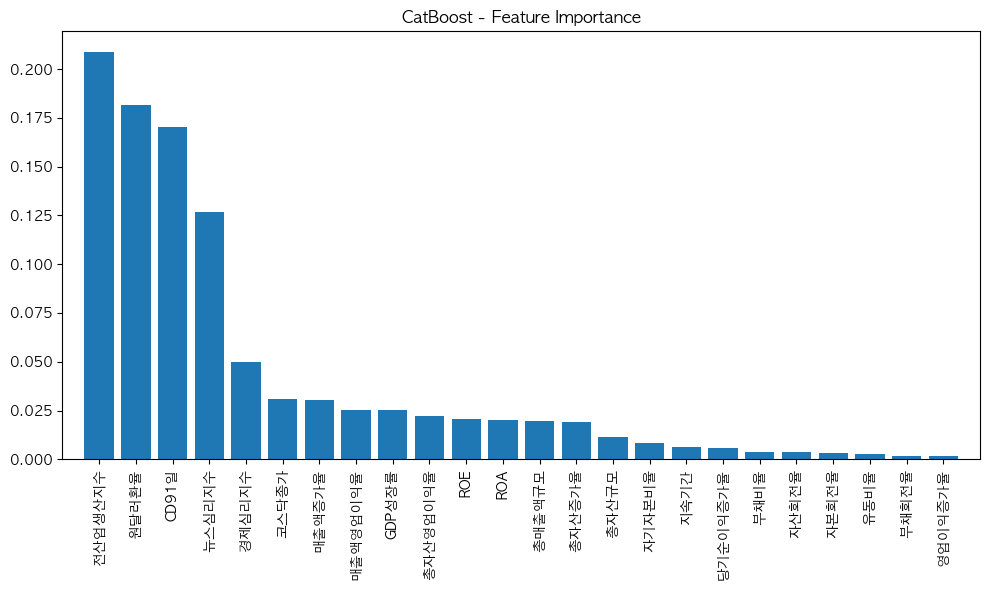

In [193]:
importances = rf.feature_importances_

# 변수 중요도를 내림차순으로 정렬
indices = importances.argsort()[::-1]

# 변수 이름 추출 (여기서 train_X은 학습 데이터의 독립 변수입니다.)
feature_names = train_X.columns

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.title("CatBoost - Feature Importance")
plt.bar(range(train_X.shape[1]), importances[indices], align="center")
plt.xticks(range(train_X.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.tight_layout()
plt.show()

In [194]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_X)

In [195]:
shap_values[0].shape

(609, 24)

In [196]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[0][0,:], test_X.iloc[0,:])

Exception: In v0.20 force_plot now requires the base value as the first parameter! Try shap.force_plot(explainer.expected_value, shap_values) or for multi-output models try shap.force_plot(explainer.expected_value[0], shap_values[0]).

In [ ]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value[0], shap_values[0])

In [ ]:
shap_values[0][0,:]

array([-1.12645128e-03,  2.09834890e-05, -5.15452860e-03,  1.87801918e-02,
        7.17799452e-03, -1.76630348e-03,  1.40104537e-02,  1.49323137e-02,
       -6.82971275e-03,  5.52940929e-03,  1.80598965e-03,  9.33030461e-04,
       -1.28805297e-02,  7.19616915e-04, -2.51740031e-02,  1.85947405e-02,
        1.52686313e-02,  1.31818604e-02,  9.17053764e-02,  8.72695514e-02,
        2.04889374e-02,  1.06695938e-01,  2.52755352e-02,  6.02082178e-02])

In [ ]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

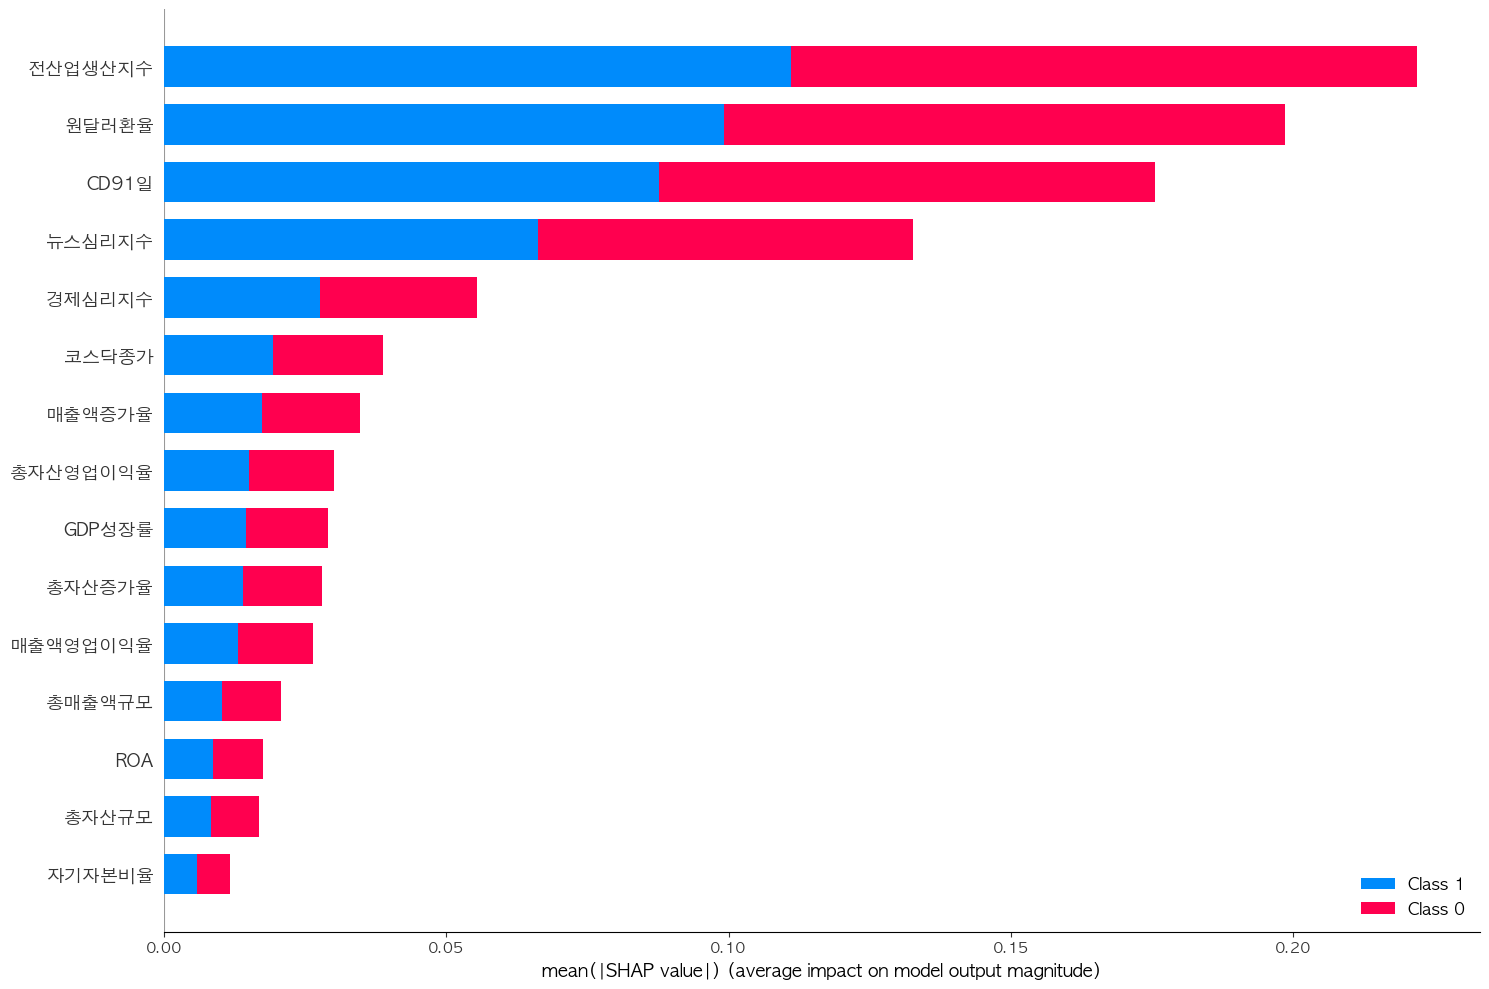

In [ ]:
# summary
shap.summary_plot(shap_values, test_X, max_display=15, plot_size=(15,10))

In [ ]:
test_X.columns.shape

(24,)

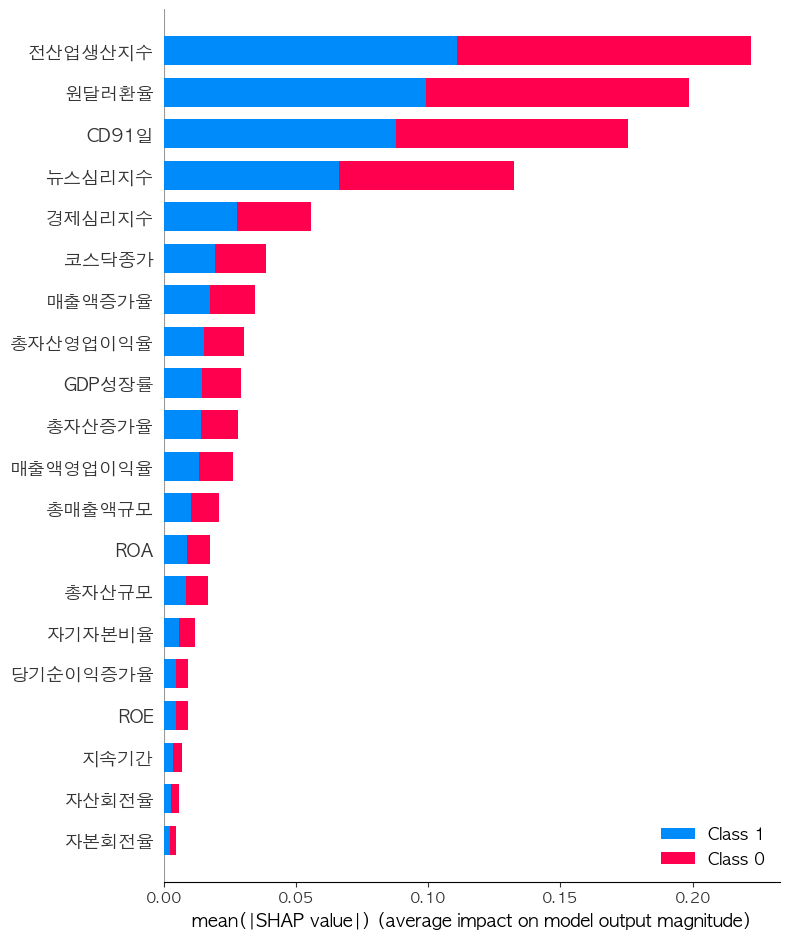

In [ ]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_X, plot_type = "bar")

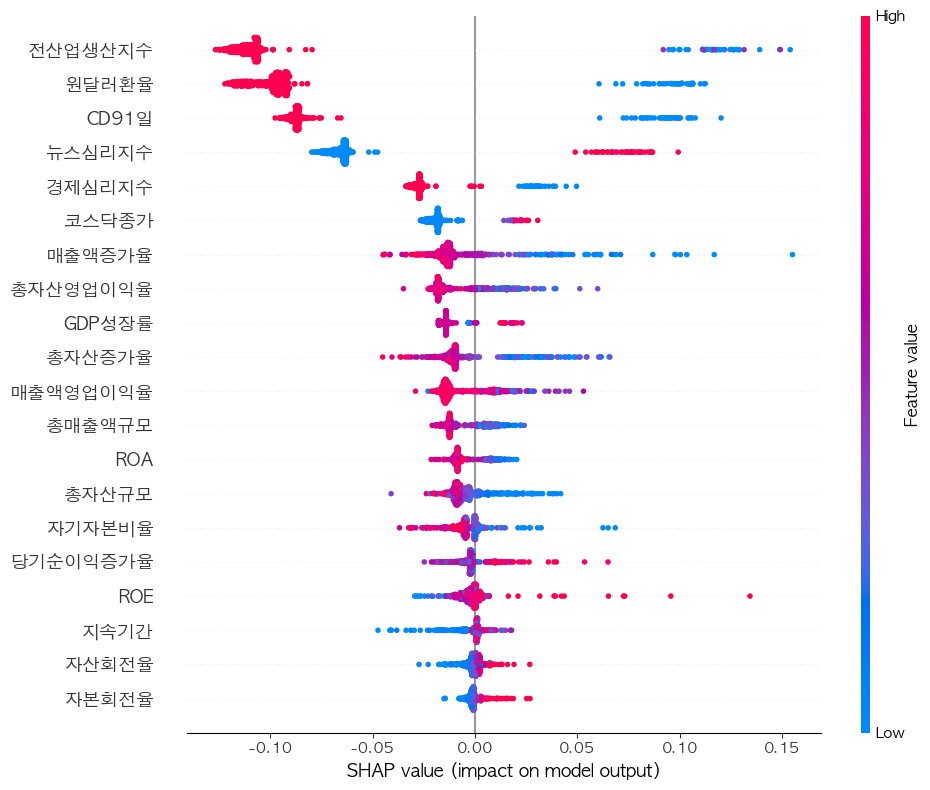

In [ ]:
shap.summary_plot(shap_values[1], test_X, plot_size=(10,8))

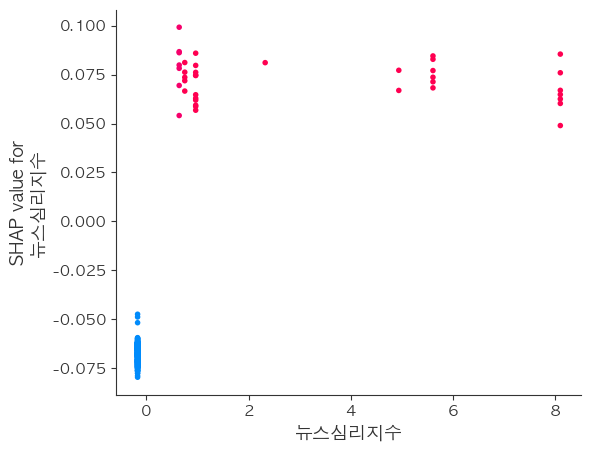

In [ ]:
# 변수 간의 shap value 파악
shap.dependence_plot("뉴스심리지수", shap_values[1], test_X, interaction_index="뉴스심리지수")

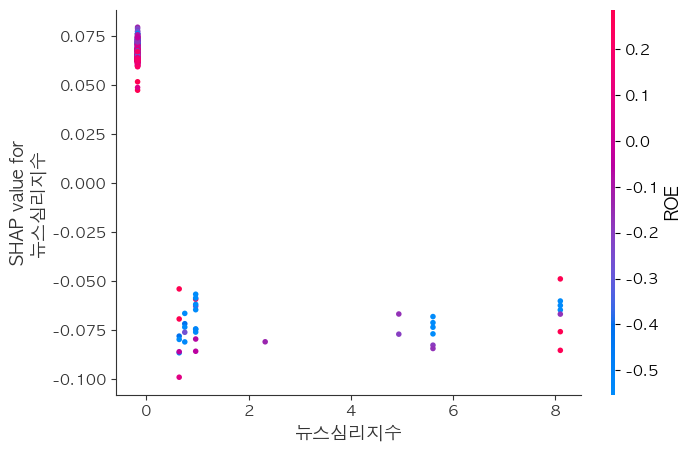

In [ ]:
# 변수 간의 shap value 파악
shap.dependence_plot("뉴스심리지수", shap_values[0], test_X)

### 변수 중요도 기반 cut

In [200]:
feature_names = train_X.columns

rf_resultX = pd.DataFrame(shap_values[1], columns = feature_names)

vals = np.abs(rf_resultX.values).mean(0)

shap_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name','feature_importance_vals'])
shap_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)
shap_importance

,col_name,feature_importance_vals
21,전산업생산지수,0.110977
18,원달러환율,0.099270
19,CD91일,0.087730
23,뉴스심리지수,0.066320
22,경제심리지수,0.027757
20,코스닥종가,0.019431
8,매출액증가율,0.017350
3,총자산영업이익율,0.015091
17,GDP성장률,0.014555
7,총자산증가율,0.014006


### 0.01 cutoff

In [211]:
x_list = shap_importance[shap_importance.feature_importance_vals>=0.01]['col_name'].tolist()

In [212]:
train_cut_X = train_X[x_list]
test_cut_X = test_X[x_list]

In [213]:
test_cut_X.columns

Index(['전산업생산지수', '원달러환율', 'CD91일', '뉴스심리지수', '경제심리지수', '코스닥종가', '매출액증가율',
       '총자산영업이익율', 'GDP성장률', '총자산증가율', '매출액영업이익율', '총매출액규모'],
      dtype='object')

In [214]:
train_cut_X.shape

(1734, 12)

In [215]:
# Define the CatBoost Regressor model
rf_cut = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the grid search using the model and hyperparameters
grid_search_rf_cut = GridSearchCV(rf_cut, param_grid, scoring='f1_macro', cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search_rf_cut.fit(train_cut_X, train_y)

# Print the best parameters and the best score
print("Best parameters:", grid_search_rf_cut.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [216]:
rf_cut = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42)
rf_cut.fit(train_cut_X, train_y)

print(f"Accuracy for Selected RandomForest : {accuracy_score(test_y, rf_cut.predict(test_cut_X))}")
print(f"F1_score for Selected RandomForest : {f1_score(test_y, rf_cut.predict(test_cut_X))}")

Accuracy for Selected RandomForest : 0.9901477832512315
F1_score for Selected RandomForest : 0.9285714285714286
